###  описательный анализ данных и

In [116]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/reni_land/master/data.csv')

In [96]:
cors = pd.read_csv('https://raw.githubusercontent.com/alnagaev/reni_land/master/geo.csv', header = None, names = ['cors'])

In [97]:
new = cors["cors"].str.split(" ", n = 1, expand = True) 
cors['lat'] = new[0].astype('float')
cors['lng'] = new[1].astype('float')



In [114]:
inn = df['inn'].tolist()
lat = cors['lat'].tolist()
lon = cors['lng'].tolist()
status = df['egrulStatus'].tolist()


def color_change(status):
    if(status == 'Ликвидирована'):
        return('red')   
    return('green')

In [115]:
#popup=folium.Popup(name, parse_html=True)

saratov_map = folium.Map(location=[51.32, 46.00], zoom_start=6)

for lat, lon, inn, status in zip(lat, lon, inn, status):
    folium.CircleMarker(location=[lat, lon], popup = str(inn).replace('.0', ''), radius = 9, fill_color=color_change(status)).add_to(saratov_map)

saratov_map.save("map1.html")

In [104]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


0       6451999844.000
1       6454999190.000
2       6450999841.000
3       6450999810.000
4       6439999975.000
             ...      
12980   6451901915.000
12981   6451901263.000
12982   6451901249.000
12983   6453035130.000
12984   6453034947.000
Name: inn, Length: 12985, dtype: float64

In [4]:
df['dateOgrn'] = pd.to_datetime(df['dateOgrn'])



In [39]:
df.egrulStatus.value_counts()

Ликвидирована    6827
Действует        6158
Name: egrulStatus, dtype: int64

In [57]:
df['minjustStatus'].value_counts()

Исключена           4160
Зарегистрирована    2229
Name: minjustStatus, dtype: int64

In [56]:
df['egrulStatus'].value_counts()

Ликвидирована    6827
Действует        6158
Name: egrulStatus, dtype: int64

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[df['incomeTotal'] > 0].describe()['incomeTotal']

count         423.000
mean      8107314.271
std      43199783.310
min          3875.640
25%        249834.000
50%        918815.000
75%       3463507.590
max     588473985.390
Name: incomeTotal, dtype: float64

In [63]:
df[df['incomeTotal'] > 588473985]

,Unnamed: 0,address,dateOgrn,egrulStatus,fullName,hasRegionalSupport,incomeRank,incomeTotal,inn,kpp,minjustForm,minjustStatus,year
5261,262542,"410004, ОБЛАСТЬ САРАТОВСКАЯ, ГОРОД САРАТОВ, ПР...",2004-08-02,Действует,"ЧАСТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ""КЛИНИЧЕСКА...",False,Высокий,588473985.390,6454070024.000,645401001.000,Учреждение,Зарегистрирована,2004


In [89]:
df['inn']

0        6.452000e+09
1        6.454999e+09
2        6.451000e+09
3        6.451000e+09
4        6.440000e+09
             ...     
12980    6.451902e+09
12981    6.451901e+09
12982    6.451901e+09
12983    6.453035e+09
12984    6.453035e+09
Name: inn, Length: 12985, dtype: float64

In [48]:
new = df[df['year'] != 2002] #2002 не считаем т.к все зарегались в этот год

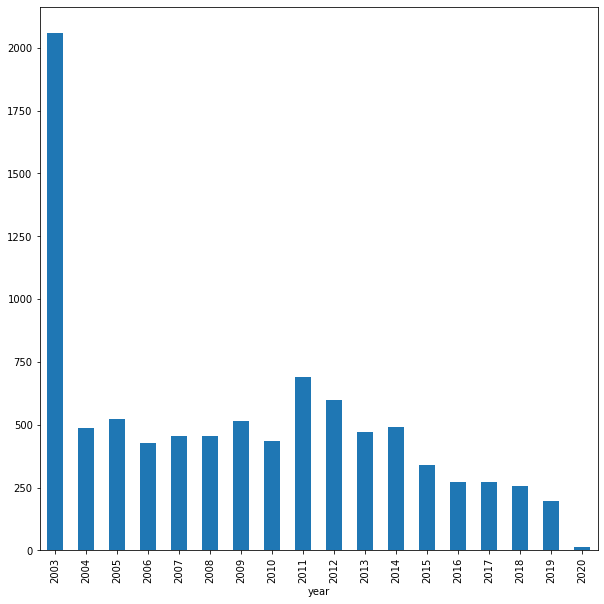

In [54]:
new.groupby(['year']).count()['address'].plot(kind='bar', figsize = (10, 10))

(51.481492458797305, 45.913265908650494)

In [8]:
#Хочется получить геоданные, но вряд ли успею. Тут многопоточность бы пригодилась, но вероятнее всего забанят по айпи
from time import sleep
import geocoder
import csv 
coord = []
counter = 0
with open('test_nan.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(12625, len(df['address'])): 
        if i%1000 == 0:
            print('stage {} complete'.format(i))
        try:
            g = geocoder.arcgis(df['address'].iloc[i])
            obj = [g.json['lat'], g.json['lng']]
            spamwriter.writerow(obj)
        except:
            spamwriter.writerow(('None', 'None'))#     sleep(1)    
             
        


stage 5000 complete
stage 6000 complete


In [53]:
import geocoder
g = geocoder.arcgis(df['address'].iloc[8167])
obj = [g.json['lat'], g.json['lng']]
obj

[51.530755096860766, 46.035511070517494]